# Clase en línea
#### Viernes 03 de marzo de 2020

Hasta ahora habiamos calculado cual era la probabilidad de que dado una seríe de datos nuestro modelo se ajuste. Podemos utilizar el poderoso teorema de Bayes para calcular la probabilidad de que nuestros datos se ajusten dado un modelo. Utilizando el Likelihood encontramos una nueva cantidad llamada Posterior, usando un ''prior''

Definir un prior plano es tener igual probabilidad en un conjuto de valores. Una funcion que tenga un parametro de entrada y verificar si cae dentro del intervalo que se define, entonces se le asigna el valor que tu defines como probabilidad, tu prior. Si no, le asignas un valor de menos infinito para que tenga sentido con el logaritmo

In [166]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:
def lnlikelihood(x, y, sigma, modelo, parametro):
    return (-1/2)*np.sum(((y-modelo(x, parametro))**2)/sigma**2)

In [168]:
def prior(param, a, b):
    if param > a and param < b:
        param = 1/(b-a)
    else:
        param = np.inf
    return param

In [239]:
def montecarlo_chain(x, y, sigma, modelo, p_i, n, nc):

    markov_matrix = []
    acept = np.zeros(nc)
    
    for ic in range(nc):
    
        P_v = lnlikelihood(x, y, sigma, modelo, p_i[ic])*prior(np.random.normal(0,1),-1,1)
        markov_chain = []
        markov_chain.append([p_i[ic], P_v])

        s = [0.1, 0.1]

        for i in range(n):
            p_n = []
            p_n = [np.random.normal(p_i[ic][0], s[0]), np.random.normal(p_i[ic][1], s[1])]

            P_n = lnlikelihood(x, y, sigma, modelo, p_n)*prior(np.random.normal(0,1),-1,1)

            if (P_n>P_v):
                markov_chain.append([p_n, P_n])
                acept[ic] = acept[ic]+1
                p_i[ic] = p_n 
                P_v = P_n
                continue
            elif  ((np.exp(P_n)/np.exp(P_v)) > np.random.randn()):
                markov_chain.append([p_n, P_n])
                acept[ic]= acept[ic]+1
    
        markov_matrix.append(markov_chain)
        
    return [markov_matrix, acept]

In [240]:
def modelo(x, parametro):
    return x*parametro[0]+parametro[1]

x = np.linspace(0,10,1000)
p_reales = [4, 9]

des = np.zeros(len(x))
for i in range(len(x)):
    des[i] = 0.1

y = x*p_reales[0] + p_reales[1]

In [252]:
p_i = [[2,2],[10,17],[9,1],[7,10], [-1,8]]
nc = 5
n = 1000

In [253]:
a = montecarlo_chain(x,y,des,modelo, p_i, n, nc)

C:\Users\guill\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


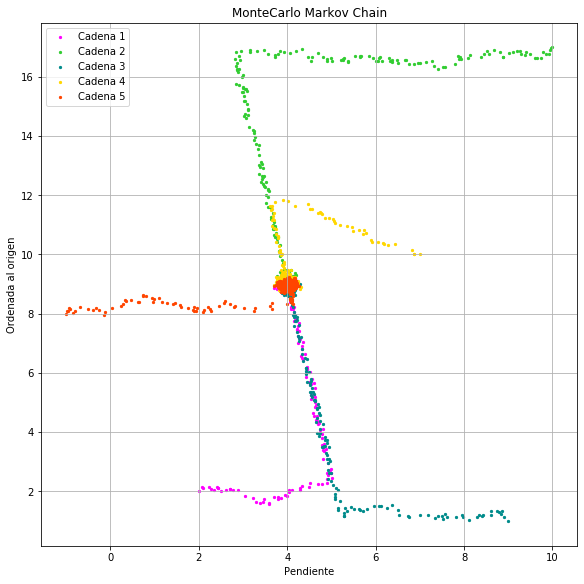

In [254]:
colores = ["#32CD32", "#008B8B", "#FFD700", "#FF4500", "#FF00FF"]
lik = []
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)
for i in range(nc):
    puntos = [x for x,y in a[0][i]]
    lik.append([y for x, y in a[0][i]])

    x_fin = [x for x, y in puntos]
    y_fin = [y for x, y in puntos]
    
    plt.scatter(x_fin, y_fin, color=colores[i-1],s=5, label='Cadena '+str(i+1))

plt.title('MonteCarlo Markov Chain')
plt.xlabel('Pendiente')
plt.ylabel('Ordenada al origen')
plt.legend()
plt.grid()

In [255]:
print('La fracción de aceptación de cada cadena es la siguiente: ')
for i in range(nc):
    print('Para la cadena ' + str(i+1) + ' es: ' + str(a[1][i]/n))

La fracción de aceptación de cada cadena es la siguiente: 
Para la cadena 1 es: 0.348
Para la cadena 2 es: 0.234
Para la cadena 3 es: 0.287
Para la cadena 4 es: 0.421
Para la cadena 5 es: 0.444


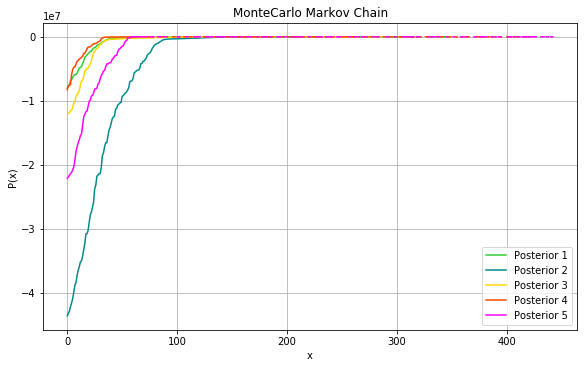

In [256]:
colores = ["#32CD32", "#008B8B", "#FFD700", "#FF4500", "#FF00FF"]
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
for i in range(nc):
    plt.plot(lik[i], color=colores[i], label='Posterior '+str(i+1))
    
plt.title('MonteCarlo Markov Chain')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid()